# Machine learning and statistical learning

## Training/ Validation/ Test Approach

### 1 Context and objectives

In this notebook, I will predict a continuous variable using a machine learning algorithm by varying the values of a hyperparameter of this algorithm. The objective is to observe the evolution of the measurement error on the training sample as well as on the test sample, according to the flexibility of the model.

The data used in this exercise give information about the target variable, the selling price of cars (in rupees) and provide details on the characteristics of the car. The dataset was downloaded from Kaggle (https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho) and cleaned.

The columns of the dataset are the following:

• `name`: name of the car

• `year`: year in which the car was bought

• `selling_price`: price the owner wants to sell the car at (in thousand rupees)

• `km_driven`: distance completed by the car in km

• `fuel`: fuel type of the car

• `seller_type`: tells if car is sold by individual or dealer

• `transmission`: Gear transmission of the car (Automatic/Manual)

• `owner`: number of previous owners

• `mileage`: mileage of the car

• `engine`: engine capacity of the car

• `max_power`: max power of engine

• `torque`: torque of the car

• `seats`: number of seats in the car

• `sample`: whether the observation belongs to the training or testing set

### 2. First steps: preparing the data

**1. From AMeTICE, download the cars dataset (cars.csv)**

**2. Load the CSV file into R or Python**

In [1]:
# Load data

import pandas as pd
import numpy as np
import os

cwd = os.getcwd()
print(cwd)

path_data = ".\data\cars.csv"
cars_data = pd.read_csv(path_data, header = 0)
cars_data.head()

C:\Users\AMSE\Documents\Thu_Ha\ML_SL\cars_project


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


**3. Randomly split your dataset into two parts:**

a) a train set that will contain 80% of the observations

b) a test set that will contain the remaining 20%.

**4. From the train set, create two datasets:**

a) a training set that will contain 80% of the observations from the train set

b) a validation set that waill contain the remining 20%.

In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cars_data, test_size = 0.20, random_state = 0)
print("Train shape:", train.shape)
print("Test shape:", test.shape)

training, validation = train_test_split(train, test_size = 0.20, random_state = 0)
print("Training shape:", training.shape)
print("Validation shape:", validation.shape)

Train shape: (6502, 12)
Test shape: (1626, 12)
Training shape: (5201, 12)
Validation shape: (1301, 12)


### 3. Getting to know the data: descriptive statistics

**1. Compute some summary statistics for the whole dataset (and comment the outputs):**

a) for numerical variables: mean, minimum, maximum, quartiles

b) for categorical variables: for each category: proportion of observations; mean, minimum, maximum, quartiles of the target variable (selling_price)

In [ ]:
# For numerical independent variables

# year: year in which the car was bought

cars_data["year"].mean()
print("The average year in which the cars were bought is %d." % (int(cars_data["year"].mean())))
cars_data["year"].max()
print("The newest cars were bought in %d." % (cars_data["year"].max()))
cars_data["year"].min()
print("The oldest cars were bought in %d." % (cars_data["year"].min()))
st_quartile_year = int(np.percentile(cars_data["year"], 25))
median_year = int(np.percentile(cars_data["year"], 50))
rd_quartile_year = int(np.percentile(cars_data["year"], 75))
print(f"The 1st, median and 3rd quartiles of the year in which the cars were bought are {st_quartile_year}, {median_year}, {rd_quartile_year}, respectively.")

# km_driven: distance completed by the car in km

cars_data["km_driven"].mean()
print("The average distance the cars have driven is %d." % (int(cars_data["km_driven"].mean())))
cars_data["km_driven"].max()
print("The highest distance a car has driven is %d." % (cars_data["km_driven"].max()))
cars_data["km_driven"].min()
print("The lowest distance a car has driven is %d." % (cars_data["km_driven"].min()))
st_quartile_km_driven = int(np.percentile(cars_data["km_driven"], 25))
median_km_driven = int(np.percentile(cars_data["km_driven"], 50))
rd_quartile_km_driven = int(np.percentile(cars_data["km_driven"], 75))
print(f"The 1st, median and 3rd quartiles of the distances that the cars have driven are {st_quartile_km_driven}, {median_km_driven}, {rd_quartile_km_driven}, respectively.")

# mileage: mileage of the car

cars_data["mileage"].mean()
print("The average number of mileage that the cars have is %d." % (int(cars_data["mileage"].mean())))
cars_data["mileage"].max()
print("The highest number of mileage a car has is %d." % (cars_data["mileage"].max()))
cars_data["mileage"].min()
print("The lowest number of mileage a car has is %d." % (cars_data["mileage"].min()))
st_quartile_mileage = int(np.percentile(cars_data["mileage"], 25))
median_mileage = int(np.percentile(cars_data["mileage"], 50))
rd_quartile_mileage = int(np.percentile(cars_data["mileage"], 75))
print(f"The 1st, median and 3rd quartiles of the number of mileage that the cars have are {st_quartile_mileage}, {median_mileage}, {rd_quartile_mileage}, respectively.")

# engine: engine capacity of the car

cars_data["engine"].mean()
print("The average engine capacity the cars have is %d." % (int(cars_data["engine"].mean())))
cars_data["engine"].max()
print("The highest engine capacity a car has is %d." % (cars_data["engine"].max()))
cars_data["engine"].min()
print("The lowest engine capacity a car has is %d." % (cars_data["engine"].min()))
st_quartile_engine = int(np.nanpercentile(cars_data["engine"], 25))
median_engine = int(np.nanpercentile(cars_data["engine"], 50))
rd_quartile_engine = int(np.nanpercentile(cars_data["engine"], 75))
print(f"The 1st, median and 3rd quartiles of the engine capacity that the cars have are {st_quartile_engine}, {median_engine}, {rd_quartile_engine}, respectively.")

# max_power: max power of engine

cars_data["max_power"].mean()
print("The average max power of engine the cars have is %d." % (int(cars_data["max_power"].mean())))
cars_data["max_power"].max()
print("The highest max power of engine a car has is %d." % (cars_data["max_power"].max()))
cars_data["max_power"].min()
print("The lowest max power of engine a car has is %d." % (cars_data["max_power"].min()))
st_quartile_max_power = int(np.nanpercentile(cars_data["max_power"], 25))
median_max_power = int(np.nanpercentile(cars_data["max_power"], 50))
rd_quartile_max_power = int(np.nanpercentile(cars_data["max_power"], 75))
print(f"The 1st, median and 3rd quartiles of the max power of engine that the cars have are {st_quartile_max_power}, {median_max_power}, {rd_quartile_max_power}, respectively.")

# seats: number of seats in the car

cars_data["seats"].mean()
print("The average number of seats in the car is %d." % (int(cars_data["seats"].mean())))
cars_data["seats"].max()
print("The highest number of seats in the car is %d." % (cars_data["seats"].max()))
cars_data["seats"].min()
print("The lowest number of seats in the car is %d." % (cars_data["seats"].min()))
st_quartile_seats = int(np.nanpercentile(cars_data["seats"], 25))
median_seats = int(np.nanpercentile(cars_data["seats"], 50))
rd_quartile_seats = int(np.nanpercentile(cars_data["seats"], 75))
print(f"The 1st, median and 3rd quartiles of the number of seats in the car are {st_quartile_seats}, {median_seats}, {rd_quartile_seats}, respectively.")

In [ ]:
# For categorical variables 

# fuel: fuel type of the car

df_fuel = pd.DataFrame(cars_data["fuel"].value_counts(normalize=True))
print("The proprotion of diesel is %d, the proportion of petrol is %d, the proportion of CNG is %d, and the proportion of LPG is %d." % ((df_fuel.at["Diesel", "fuel"]*100), (df_fuel.at["Petrol", "fuel"]*100), (df_fuel.at["CNG", "fuel"]*100), (df_fuel.at["LPG", "fuel"]*100)))

# seller_type: tells if car is sold by individual or dealer

df_seller_type = pd.DataFrame(cars_data["seller_type"].value_counts(normalize=True))
print("The proprotion of cars sold by an individual is %d, the proportion of cars sold by a dealer is %d, the proportion of cars sold by a trustmark dealer is %d." % ((df_seller_type.at["Individual", "seller_type"]*100), (df_seller_type.at["Dealer", "seller_type"]*100), (df_seller_type.at["Trustmark Dealer", "seller_type"]*100)))

# transmission: gear transmission of the car (Automatic/Manual)

df_transmission = pd.DataFrame(cars_data["transmission"].value_counts(normalize=True))
print("The proprotion of cars having automatic gear transmission is %d, the proportion of cars having manual gear transmission is %d." % ((df_transmission.at["Automatic", "transmission"]*100), (df_transmission.at["Manual", "transmission"]*100)))

# owner: number of previous owners

df_owner = pd.DataFrame(cars_data["owner"].value_counts(normalize=True))
print("The proprotion of cars having one owner is %d, the proportion of cars having two owners is %d, the proportion of cars having three owners is %d, the proportion of cars having three or more owners is %d, the proportion of test drive car is %d." % ((df_owner.at["First Owner", "owner"]*100), (df_owner.at["Second Owner", "owner"]*100), (df_owner.at["Third Owner", "owner"]*100), (df_owner.at["Fourth & Above Owner", "owner"]*100), (df_owner.at["Test Drive Car", "owner"]*100)))

In [ ]:
# For our target variable

# selling_price: price the owner wants to sell the car at (in thousand rupees)

cars_data["selling_price"].mean()
print("The average selling price is %d thousand rupees." % (int(cars_data["selling_price"].mean())))
cars_data["selling_price"].max()
print("The highest selling price is %d thousand rupees." % (cars_data["selling_price"].max()))
cars_data["selling_price"].min()
print("The lowest selling price is %d thousand rupees." % (cars_data["selling_price"].min()))
st_selling_price = int(np.percentile(cars_data["selling_price"], 25))
median_selling_price = int(np.percentile(cars_data["selling_price"], 50))
rd_selling_price = int(np.percentile(cars_data["selling_price"], 27))
print(f"The 1st, median and 3rd quartiles of the selling price are {st_selling_price}, {median_selling_price}, {rd_selling_price} thousand rupees, respectively.")

**2. Create graphs to show the relationship between the target variable and the explanatory variables. Comment on these.**

In [ ]:
# The relationship between "selling_price" and "year"

import matplotlib.pyplot as plt

plt.scatter(cars_data["year"], cars_data["selling_price"], c = "green")
plt.xlabel("year")
plt.ylabel("selling_price")
plt.show()

*Comment: As can be seen from the graph, there is a positive relationship between the selling price and the year in which the cars were bought; or in other words, the newer the cars in terms of the year in which they were bought, the higher their secondhand prices.*

In [ ]:
# The relationship between "selling_price" and "km_driven"

import matplotlib.pyplot as plt

plt.scatter(cars_data["km_driven"], cars_data["selling_price"], c = "pink")
plt.xlabel("km_driven")
plt.ylabel("selling_price")
plt.show()

*Comment: The graph shows a negative relationship between the selling price and the km driven of the cars. Specifically, the lower the km driven (which can be considered as an indicator of how new the car is), the higher the secondhand price.*

In [ ]:
# The relationship between "selling_price" and "fuel"

import matplotlib.pyplot as plt

plt.scatter(cars_data["fuel"], cars_data["selling_price"], c = "orange")
plt.xlabel("fuel")
plt.ylabel('selling_price')
plt.show()

*Comment: It can be seen that among the four types of fuel, the cars run by diesel or pertrol tend to be bought with higher seconhand price than that of LPG or CNG.*

In [ ]:
# The relationship between "selling_price" and "seller_type"

import matplotlib.pyplot as plt

plt.scatter(cars_data["seller_type"], cars_data["selling_price"], c = "blue")
plt.xlabel("seller_type")
plt.ylabel("selling_price")
plt.show()

*Comment: It is hard to tell if there is any clear relationship between the selling price and the seller type from this graph.*

In [ ]:
# The relationship between "selling_price" and "transmission"

import matplotlib.pyplot as plt

plt.scatter(cars_data["transmission"], cars_data["selling_price"], c = "brown")
plt.xlabel("transmission")
plt.ylabel("selling_price")
plt.show()

*Comment: From this graph, it can be said that the automatic cars tend to be bought at higher price than the manual cars.*

In [ ]:
# The relationship between "selling_price" and "owner"

import matplotlib.pyplot as plt

plt.scatter(cars_data["owner"], cars_data["selling_price"], c = "purple")
plt.xlabel("owner")
plt.ylabel("selling_price")
plt.show()

*Comment: There is a pretty clear trend from this graph, the cars owned by fewer owners (again, number of owner can be seen as another indicator of how new the car is) tend to have higher secondhand prices.*

In [ ]:
# The relationship between "selling_price" and "mileage"

import matplotlib.pyplot as plt

plt.scatter(cars_data["mileage"], cars_data["selling_price"], c = "yellow")
plt.xlabel("mileage")
plt.ylabel("selling_price")
plt.show()

*Comment: It is hard to tell if there is any clear relationship between the selling price and the mileage from this graph.*

In [ ]:
# The relationship between "selling_price" and "engine"

import matplotlib.pyplot as plt

plt.scatter(cars_data["engine"], cars_data["selling_price"], c = "black")
plt.xlabel("engine")
plt.ylabel("selling_price")
plt.show()

*Comment: It is hard to tell if there is any clear relationship between the selling price and the engine from this graph.*

In [ ]:
# The relationship between "selling_price" and "max_power"

import matplotlib.pyplot as plt

plt.scatter(cars_data["max_power"], cars_data["selling_price"], c = "grey")
plt.xlabel("max_power")
plt.ylabel("selling_price")
plt.show()

*Comment: It is hard to tell if there is any clear relationship between the selling price and the maximum power of the cars from this graph.*

In [ ]:
# The relationship between "selling_price" and "seats"

import matplotlib.pyplot as plt

plt.scatter(cars_data["seats"], cars_data["selling_price"], c = "red")
plt.xlabel("seats")
plt.ylabel("selling_price")
plt.show()

*Comment: It is hard to tell if there is any clear relationship between the selling price and the number of seats of the cars from this graph.*

### 4. Estimations

**You will train two different models: a random forest and a SVM.**

**4.1 A first model: Random forest**

You will first try to predict the selling price of the cars using a random forest. You will make 3 hyperparameters vary.

**1. Using a random forest algorithm, predict the selling price of the car in the training set uing the following variables: year, fuel, km_driven.**

In [3]:
# Convert categorial independent variable with label encoder

from sklearn.preprocessing import LabelEncoder

# Create arrary of categorial variable to be encoded

categorical_col = ["fuel"]
le = LabelEncoder()

# Apply label encoder on categorical feature column

training[categorical_col] = training[categorical_col].apply(lambda col: le.fit_transform(col))
test[categorical_col] = test[categorical_col].apply(lambda col: le.fit_transform(col))
validation[categorical_col] = validation[categorical_col].apply(lambda col: le.fit_transform(col))

In [4]:
# Estimation

# First model: Random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

y_training = training.selling_price
X_training = training[["year", "fuel", "km_driven"]]

y_validation = validation.selling_price
X_validation = validation[["year", "fuel", "km_driven"]]

y_test = test.selling_price
X_test = test[["year", "fuel", "km_driven"]]

# Train model on the training dataset

# X, y = make_regression(n_features = 3)

regr_train = RandomForestRegressor(n_estimators = 20, max_features = 3, min_samples_leaf = 10, random_state = 0)
regr_train.fit(X_training, y_training)

RandomForestRegressor(max_features=3, min_samples_leaf=10, n_estimators=20,
                      random_state=0)

**2. Compute the mean squared error both for the training and the validation datasets. Compare them with each other.**

In [5]:
# Assess the goodness of fit by computing MSE on the training and validation dataset

y_pred_train = regr_train.predict(X_training)
y_pred_validation = regr_train.predict(X_validation)

from sklearn.metrics import mean_squared_error
mse_trained = mean_squared_error(y_training, y_pred_train)
print("MSE for the train set is", mse_trained)
mse_validated = mean_squared_error(y_validation, y_pred_validation)
print("MSE for the validation set is", mse_validated)

MSE for the train set is 207751147160.7179
MSE for the validation set is 252762070921.7599


*Comment: The MSE for the validation test is slightly higher than that for the train set.*

**3. Now, using a loop, make the minimum size of terminal nodes vary as follows: 10, 20, 30, . . . , 100. At each iteration, compute the mean squared error (and store it) for both samples.**

In [6]:
mse_train_node = []
mse_validation_node = []

for i in range(10, 110, 10):
    reg = RandomForestRegressor(n_estimators = 20, max_features = 3, min_samples_leaf = i, random_state = 0)
    reg.fit(X_training, y_training)
    # Predict for the training set
    y_train_pred = reg.predict(X_training)
    # Calculate the MSE on the training set
    mse_train = mean_squared_error(y_training, y_train_pred)
    mse_train_node.append(mse_train)
   
    # Predict for the validation set
    y_validation_pred = reg.predict(X_validation)
    # Calculate the MSE on the validation set
    mse_validation = mean_squared_error(y_validation, y_validation_pred)
    mse_validation_node.append(mse_validation)
    
    print("node", i, " - MSE_train:", mse_train,  " - MSE_validation:", mse_validation)

node 10  - MSE_train: 207751147160.7179  - MSE_validation: 252762070921.7599
node 20  - MSE_train: 227911009970.1841  - MSE_validation: 258695669783.84253
node 30  - MSE_train: 253904414516.11432  - MSE_validation: 276695808672.6283
node 40  - MSE_train: 294690236541.9102  - MSE_validation: 313114805678.8977
node 50  - MSE_train: 321156558712.8613  - MSE_validation: 333788084606.0197
node 60  - MSE_train: 349518782105.71564  - MSE_validation: 371158863748.0613
node 70  - MSE_train: 361490346131.10284  - MSE_validation: 380217939172.8407
node 80  - MSE_train: 378065228522.1013  - MSE_validation: 397136505256.0076
node 90  - MSE_train: 381204341352.81006  - MSE_validation: 398831928822.9421
node 100  - MSE_train: 382044702876.8574  - MSE_validation: 400823719863.7507


**4. On a graph, plot the mean squared error as a function of the node size, for both samples (one curve for each sample). Comment.**

In [ ]:
# Plot the mean squared error as a function of the node size for the train and validation set

import matplotlib.pyplot as plt

nodes = range(10, 110, 10)
plt.figure()
plt.plot(nodes, mse_train_node, label = "MSE for the train set")
plt.plot(nodes, mse_validation_node, label = "MSE for the validation set")
plt.xlabel("Nodes")
plt.ylabel("MSE")
plt.title("MSE for different node sizes")
plt.legend()
plt.show()

*Comment: As the nodes increase, it can be seen that the MSEs for both the train and validation set also increase.*

**5. What are the values for your hyperparameters (the number of trees, the number of variables randomly sampled as candidates at each split, and the minimum size of terminal nodes) that provide the best fit with regard to the MSE?**

In [7]:
# The best fit with regard to the MSE

# parameter grid
param_grid = {"n_estimators": [100, 500], 
              "max_features": [1, 3, 5],
              "min_samples_leaf": [10, 20, 30]
             }

# Create a regression tree
tree_reg = RandomForestRegressor(random_state = 0)

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(tree_reg, # model
                          param_grid, # parameter grid
                          scoring = "neg_mean_squared_error", # metric to evaluate
                          return_train_score = True,
                          cv = 3)

# CV using all parameter combinations in the grid
grid_search.fit(X_training, y_training)

# the best hyperparameters
grid_search.best_params_

# the best model
grid_search.best_estimator_

C:\Users\AMSE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AMSE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMSE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\AMSE\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AMSE\anaconda3\lib\site-packages\joblib\

RandomForestRegressor(max_features=3, min_samples_leaf=10, n_estimators=500,
                      random_state=0)

*Comment: The model which provides the best fit with regard to MSE has the hyperpameters as follows:*

*Number of tree: 500*

*Number of variables randomly sampled as candidates at each split: 3*

*Minimum size of terminal nodes: 10*

**4.2 A second model: SVM**

**1. Using a Support Vector Machine (SVM) with a linear kernel, predict the selling price of the car in the training set. Use the following variables: year, fuel, km_driven.**

In [8]:
# SVM

from sklearn.svm import SVR

# Rescale features

from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler().fit(X_training)
X_training_sc = scaler_X.transform(X_training)
X_validation_sc = scaler_X.transform(X_validation)
X_test_sc = scaler_X.transform(X_test)

# Reshape the target variable before rescaling

y_training_reshape = y_training.values.reshape(-1, 1)
y_validation_reshape = y_validation.values.reshape(-1, 1)
y_test_reshape = y_test.values.reshape(-1, 1)

# Rescale the target variable

scaler_y = StandardScaler().fit(y_training_reshape)
y_training_sc = scaler_y.transform(y_training_reshape)
y_validation_sc = scaler_y.transform(y_validation_reshape)
y_test_sc = scaler_y.transform(y_test_reshape)

# Now we can fit the SVM model

SVR_train = SVR(kernel = "linear", C = 10)
SVR_train.fit(X_training_sc, y_training_sc)

C:\Users\AMSE\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, kernel='linear')

In [ ]:
# A way to make pipeline to rescale the data
# from sklearn.pipeline import make_pipeline
# model_SVM = make_pipeline(StandardScaler(), SVR(C=10, kernel = "linear"))

**2. Compute the mean squared error both for the training and the validation datasets. Compare them with each other.**

In [9]:
# Assess the goodness of fit by computing MSE on the training and validation dataset

y_pred_train_SVM = SVR_train.predict(X_training_sc)
y_pred_validation_SVM = SVR_train.predict(X_validation_sc)

from sklearn.metrics import mean_squared_error
mse_trained_SVM = mean_squared_error(y_training_sc, y_pred_train_SVM)
print("MSE for the train set is", mse_trained_SVM)
mse_validated_SVM = mean_squared_error(y_validation_sc, y_pred_validation_SVM)
print("MSE for the validation set is", mse_validated_SVM)

MSE for the train set is 0.8751868466029036
MSE for the validation set is 0.9662448253450787


*Comment: The MSE for both the train and validation set are relatively low. The MSE for the validation test is fairly higher than that for the test set.*

**3. Now, using a loop, make the costs vary.**

In [10]:
mse_train_SVM = []
mse_validation_SVM = []

for i in 10**np.linspace(start=3, stop=-2, num=50):
    SVM_model = SVR(kernel = "linear", C = i)
    SVM_model.fit(X_training_sc, y_training)
    
    # Predict for the training set
    y_train_pred_SVM = SVM_model.predict(X_training_sc)
    
    # Calculate the MSE on the training set
    mse_train_SVM_value = mean_squared_error(y_training, y_train_pred_SVM)
    mse_train_SVM.append(mse_train_SVM_value)
    
    # Predict for the validation set
    y_validation_pred_SVM = SVM_model.predict(X_validation_sc)
    
    # Calculate the MSE on the validation set
    mse_validation_SVM_value = mean_squared_error(y_validation, y_validation_pred_SVM)
    mse_validation_SVM.append(mse_validation_SVM_value)
    
    print("Cost", i, " - MSE_train_SVM:", mse_train_SVM_value,  " - MSE_validation_SVM:", mse_validation_SVM_value)

Cost 1000.0  - MSE_train_SVM: 558820713547.1471  - MSE_validation_SVM: 617438758758.6605
Cost 790.6043210907702  - MSE_train_SVM: 560160314067.5717  - MSE_validation_SVM: 618944779801.4979
Cost 625.0551925273976  - MSE_train_SVM: 561335897976.6921  - MSE_validation_SVM: 620263480639.6525
Cost 494.1713361323833  - MSE_train_SVM: 562589490889.418  - MSE_validation_SVM: 621721395293.3711
Cost 390.6939937054617  - MSE_train_SVM: 563809420142.723  - MSE_validation_SVM: 623158017197.1583
Cost 308.88435964774817  - MSE_train_SVM: 565899882364.426  - MSE_validation_SVM: 625577876976.5743
Cost 244.205309454865  - MSE_train_SVM: 568794505819.5822  - MSE_validation_SVM: 628959636411.6649
Cost 193.06977288832496  - MSE_train_SVM: 571266907725.111  - MSE_validation_SVM: 631822717189.0901
Cost 152.64179671752333  - MSE_train_SVM: 574294695681.4849  - MSE_validation_SVM: 635267787477.3677
Cost 120.67926406393289  - MSE_train_SVM: 578527631031.9647  - MSE_validation_SVM: 640064176676.4885
Cost 95.4095

**4. On a graph, plot the mean squared error as a function of the node size, for both samples (one curve for each sample). Comment.**

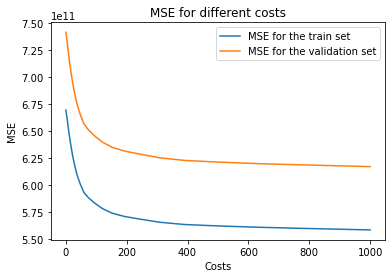

In [11]:
# Plot the mean squared error as a function of the cost for the train and validation set

import matplotlib.pyplot as plt

costs = 10**np.linspace(start=3, stop=-2, num=50)
plt.figure()
plt.plot(costs, mse_train_SVM, label = "MSE for the train set")
plt.plot(costs, mse_validation_SVM, label = "MSE for the validation set")
plt.xlabel("Costs")
plt.ylabel("MSE")
plt.title("MSE for different costs")
plt.legend()
plt.show()

*Comment: As can be seen from the graph, the MSE decreases sharply after increasing the cost from 0 to roughly 100, and then decreases at a lower pace for the cost varying from 200 to 1000. Additionally, the MSE for the validation set is higher than that for the train set.*

**5. What are the values for your hyperparameters (the number of trees, the number of variables randomly sampled as candidates at each split, and the minimum size of terminalnodes) that provide the best fit with regard to the MSE?**

In [12]:
# The best fit with regard to the MSE

# parameter grid
param_grid = {"kernel": ["linear", "rbf"], 
              "C": [1000, 1100, 1200, 1300, 1400]
             }

 # Create a SVM tree
tree_SVM = SVR()

from sklearn.model_selection import GridSearchCV
grid_search_SVM = GridSearchCV(tree_SVM, # model
                          param_grid, # parameter grid
                          scoring = "neg_mean_squared_error", # metric to evaluate
                          return_train_score = True,
                          cv = 3)

# CV using all parameter combinations in the grid
grid_search_SVM.fit(X_training_sc, y_training)

# the best hyperparameters
grid_search_SVM.best_params_

# the best model
grid_search_SVM.best_estimator_

SVR(C=1400, kernel='linear')

*Comment: The result from the previous question suggests that the SME decreases when increasing the costs. That's why I chose the costs from 1100 to 1400 to test in this grid, since there's no clear instruction on how to choose the costs.*

*Among the models having two types of kernel, "linear" or "rbf", and the costs varying from [1000, 1100, 1200, 1300, 1400], the model which provides the best fit has the hyperparameters as follows:*

*The kernel: linear*

*The cost: 1400 - the highest in the grid*

### 4.3 Select your model

**1. Compute the MSE on the test set for the random forest with the selected values for the hyperparameters.**

In [13]:
# Compute the MSE on the test set for the random forest with the selected values for the hyperparameters

# Random Forest
regr_best = RandomForestRegressor(n_estimators = 500, max_features = 3, min_samples_leaf = 10, random_state = 0)
regr_best.fit(X_test, y_test)

# Assess the goodness of fit by computing MSE on the training and validation dataset
y_pred_best = regr_best.predict(X_test)

mse_best_RandomForest = mean_squared_error(y_test, y_pred_best)
print("MSE for the best RandomForest model is", mse_best_RandomForest)

MSE for the best RandomForest model is 315954584193.0168


**2. Do the same for your best SVM**

In [14]:
# SVM
SVM_best = SVR(kernel = "linear", C = 1000)
SVM_best.fit(X_test_sc, y_test)

# Assess the goodness of fit by computing MSE on the training and validation dataset
y_pred_best_SVM = SVM_best.predict(X_test_sc)

mse_best_SVM = mean_squared_error(y_test, y_pred_best_SVM)
print("MSE for the best SVM model is", mse_best_SVM)

MSE for the best SVM model is 590825491070.8698


**3. Which model gives the best results on the test set? Comment.**

In [15]:
mse_best_RandomForest < mse_best_SVM

True

*Comment: Regarding to the MSE, the RandomForest model provides better result comparing to the SVM as the MSE for the former is smaller than that for the latter.*